In [1]:
# Importing all packages and functions that will be used for this problem.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
# Loading and presentation of data.
Data = pd.read_csv("../Data/data_problem2.csv", delimiter=',', header=None)
# Need to transpose or otherwise it will be hard to read data
Data = Data.T.reset_index(drop=True)
# Check first rows of data.
print(Data.head())

# Print general information about data.
print(Data.info())
print(Data.describe())

           0    1
0   8.903629  1.0
1   9.946774  1.0
2  14.458392  1.0
3   9.664572  1.0
4  14.412270  1.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       3600 non-null   float64
 1   1       3600 non-null   float64
dtypes: float64(2)
memory usage: 56.4 KB
None
                 0            1
count  3600.000000  3600.000000
mean      9.118580     0.555556
std       5.747397     0.496973
min      -3.310259     0.000000
25%       3.710522     0.000000
50%       9.091724     1.000000
75%      13.729211     1.000000
max      25.673673     1.000000


In [3]:
# Print amount of samples in each class.

# Count how many samples for 1.0 and for 0.0
class_counts = Data[1].value_counts()

# Assign counts to Class_0 and Class_1
Class_0 = class_counts.get(0.0, 0) 
Class_1 = class_counts.get(1.0, 0) 

# Print the results
print(f"Class 0 contains {Class_0} samples.")
print(f"Class 1 contains {Class_1} samples.")

Class 0 contains 1600 samples.
Class 1 contains 2000 samples.


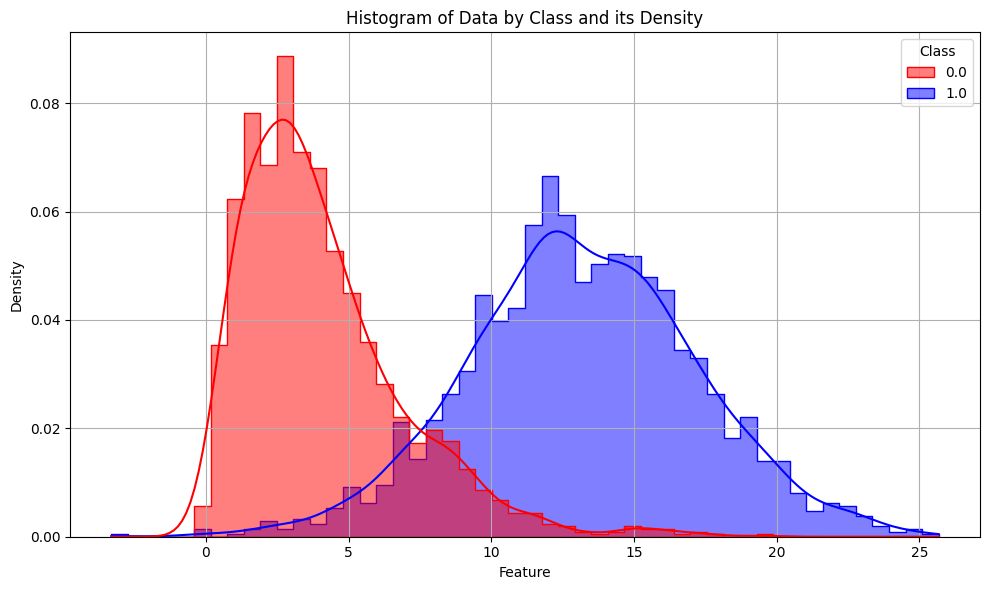

In [4]:
# Create Histogram

# To make coloms more readable
Data.columns = ['Feature', 'Class']

plt.figure(figsize=(10, 6))
colors = {0.0: 'red', 1.0: 'blue'}
sn.histplot(data = Data, x = 'Feature', hue = 'Class', bins = 50, kde = True, element = 'step', stat = 'density', alpha = 0.5, palette = colors)
plt.xlabel('Feature')
plt.ylabel('Density')
plt.title('Histogram of Data by Class and its Density')
plt.grid(True)
plt.tight_layout()
plt.show()

In [5]:
# Create test and training sets

# It is was allowed to use sklearn for splitting the data into train and test sets.
from sklearn.model_selection import train_test_split

# Split the data into features and labels
X = Data['Feature'].values
y = Data['Class'].values

# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Separate the training data by class
X_train_class_0 = X_train[y_train == 0]
X_train_class_1 = X_train[y_train == 1]



In [6]:
# Create Gamma and Gaussian distributions

# Gamma
alpha = 2
beta = np.mean(X_train_class_0) / alpha
print(f'Beta_hut for the distribution is {beta}')

def gamma_distribution(x, Alpha, Beta):
    return (x ** (Alpha - 1) * np.exp(-x / Beta)) / (Beta ** Alpha * 1)

# Gaussian
mu = np.mean(X_train_class_1)  #  mean of class 1 
sigma= np.std(X_train_class_1, ddof=1)  # variance of class 
print(f'Mu_hut for the distribution is {mu}')
print(f'Sigma_hut for the distribution is {sigma}')

def gaussian_distribution(x, Mu, Sigma):
    return (1 / (Sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - Mu) / Sigma) ** 2)


Beta_hut for the distribution is 2.0597235781750167
Mu_hut for the distribution is 13.133777099934193
Sigma_hut for the distribution is 3.997292756463767


In [7]:
# Create Bayes classifier

# For the classifier we need priors
N = len(X_train_class_0)
M = len(X_train_class_1)

Prior_0 = np.mean(y_train == 0)
Prior_1 = np.mean(y_train == 1)

def bayes_classifier(x, Alpha, Beta, Mu, Sigma, Prior_0, Prior_1):

    likelihood_0 = gamma_distribution(x, Alpha, Beta)

    likelihood_1 = gaussian_distribution(x, Mu, Sigma)

    PostPrior_0 = likelihood_0 * Prior_0
    PostPrior_1 = likelihood_1 * Prior_1

    bs = np.where(PostPrior_0 > PostPrior_1, 0, 1)

    return bs


X_test_R = X_test.reshape(-1, 1)
y_pred = bayes_classifier(X_test_R.flatten(), alpha, beta, mu, sigma, Prior_0, Prior_1)

# It was allowed to use sklearn for confusion matrix
from sklearn.metrics import confusion_matrix

# Calculate accuracy
accuracy = np.mean(y_pred ==  y_test)
print(f"Accuracy of the Bayes Classifier: {accuracy * 100:.2f}%")

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


    

Accuracy of the Bayes Classifier: 90.42%
Confusion Matrix:
[[289  31]
 [ 38 362]]
